## Лабораторная работа: Статистическое моделирование и ЦПТ

> Цель: исследовать сходимость выборочных характеристик к теоретическим значениям при увеличении объёма выборки, а также изучить свойства заданного непрерывного распределения.

In [8]:
import random
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as pl
import numpy as np

In [9]:
pl.rcParams['figure.figsize'] = (13, 9)
pl.rcParams['font.size'] = 13

In [10]:
np.random.seed(60)

##  Моделирование суммы очков при броске кубиков

Рассмотрим эксперимент:  
- Бросаем **10 кубиков**, каждый с гранями от **1 до 7**  
- Суммируем выпавшие значения → получаем случайную величину \( X \)

Минимальная сумма: \( 10 \times 1 = 10 \)  
Максимальная сумма: \( 10 \times 7 = 70 \)  
Теоретическое математическое ожидание:  
\[
E[X] = 10 \times \frac{1+7}{2} = 10 \times 4 = 40
\]  
Но в коде используется **7 граней от 1 до 7** → среднее = 4 → сумма = 40.

> **Примечание**: в коде используется `np.random.randint(1, 8, n_dice)` — это числа от 1 до 7 включительно.

In [11]:
def throw(n_dice = 10):
    return np.sum(np.random.randint(1, 7, n_dice))


In [12]:
sam_02 = [throw() for _ in range(20)]
sam_06 = [throw() for _ in range(60)]
sam_001 = [throw() for _ in range(100)]
sam_0001 = [throw() for _ in range(1000)]

In [13]:
# Проверим среднее одного кубика
one_dice = np.random.randint(1, 7, 10000)
print("Среднее одного кубика:", np.mean(one_dice))
print("Дисперсия одного кубика:", np.var(one_dice, ddof=1))

Среднее одного кубика: 3.5136
Дисперсия одного кубика: 2.9443094709470947


##  Расчёт выборочных характеристик

Для каждой выборки вычислим:
- **Выборочное среднее**: \( \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i \)
- **Несмещённую дисперсию**: \( s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 \)

Эти оценки должны приближаться к теоретическим значениям при росте \( n \).

##  Визуализация распределения (выборка n=20)

Построим:
1. **Гистограмму плотности** — показывает частоту значений
2. **KDE (Kernel Density Estimation)** — сглаженная оценка плотности распределения

Обе визуализации помогают понять форму распределения даже при малом объёме выборки.

## Сходимость выборочных характеристик

Построим графики зависимости:
- Выборочного среднего от размера выборки
- Выборочной дисперсии от размера выборки

Теоретические значения:
- Математическое ожидание: \( \mu = 40 \)  
- Дисперсия одного кубика: \( \sigma^2 = \frac{(7-1+1)^2 - 1}{12} = \frac{48}{12} = 4 \)  
  Для 10 кубиков: \( 10 \times 4 = 40 \)


Пример выборки n=20: [np.int64(28), np.int64(40), np.int64(34), np.int64(40), np.int64(26), np.int64(26), np.int64(32), np.int64(34), np.int64(23), np.int64(38), np.int64(31), np.int64(40), np.int64(26), np.int64(33), np.int64(37), np.int64(39), np.int64(28), np.int64(28), np.int64(34), np.int64(31)]
Минимум: 23 Максимум: 40
n=20:
  Мат. ожидание: 32.4000
  Дисперсия: 28.9895


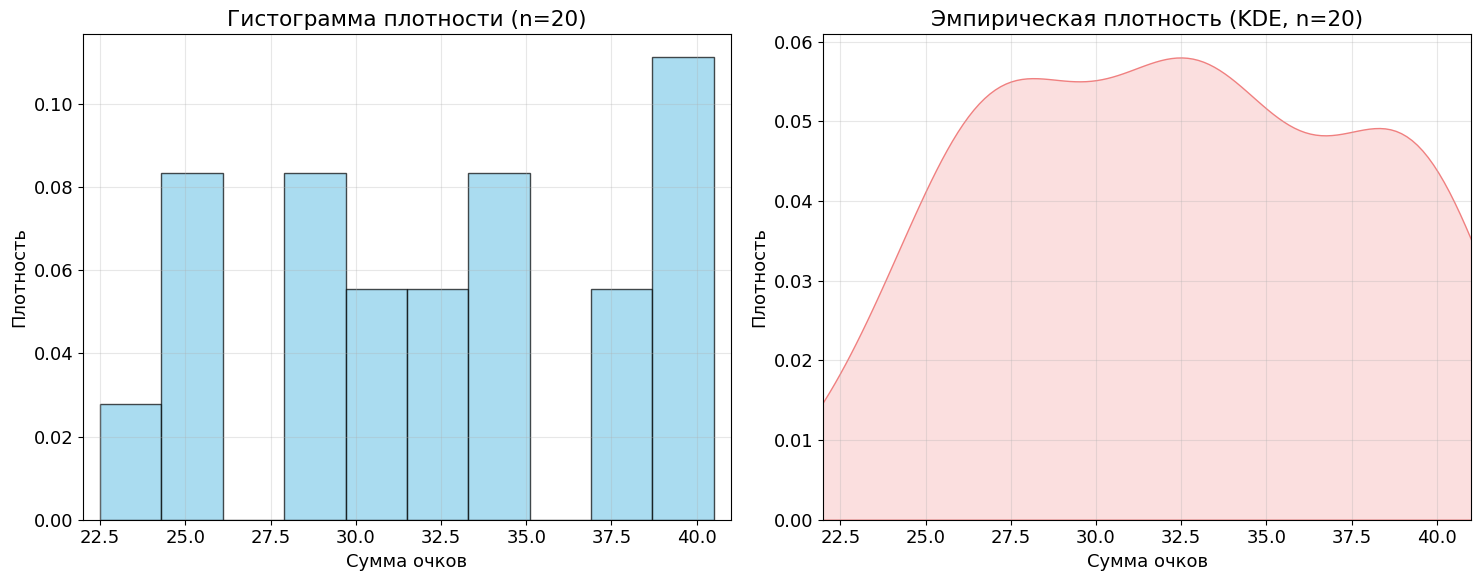

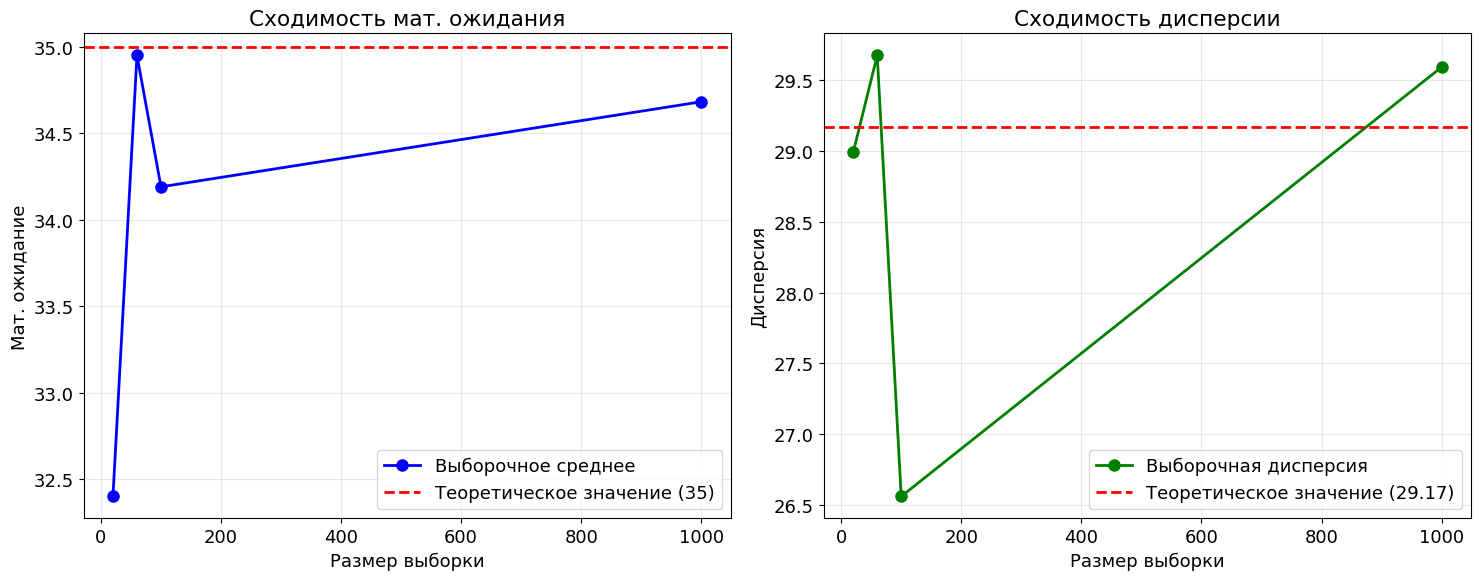


СРАВНЕНИЕ СТАТИСТИК:
Размер | Мат.ожид. | Дисперсия | Ошибка мат.ожид. | Ошибка дисперсии
-----------------------------------------------------------------
    20 |   32.4000 |   28.9895 |          2.6000 |         0.1772
    60 |   34.9500 |   29.6754 |          0.0500 |         0.5087
   100 |   34.1900 |   26.5595 |          0.8100 |         2.6072
  1000 |   34.6820 |   29.5925 |          0.3180 |         0.4258


In [14]:
print("Пример выборки n=20:", sam_02)
print("Минимум:", min(sam_02), "Максимум:", max(sam_02))

# Функция для вычисления статистик
def cal_s(data, name):
    mean = np.mean(data)
    variance = np.var(data, ddof=1)  
    print(f"{name}:")
    print(f"  Мат. ожидание: {mean:.4f}")
    print(f"  Дисперсия: {variance:.4f}")
    return mean, variance

# Вычисляем статистики
st_02 = cal_s(sam_02, "n=20")

# Построение графиков для выборки 20
fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(15, 6))

# 1. Гистограмма плотности 
ax1.hist(sam_02, bins=10, density=True, alpha=0.7, color='skyblue', 
         edgecolor='black', range=(min(sam_02)-0.5, max(sam_02)+0.5))
ax1.set_xlabel('Сумма очков')
ax1.set_ylabel('Плотность')
ax1.set_title('Гистограмма плотности (n=20)')
ax1.grid(True, alpha=0.3)
# KDE 
sns.kdeplot(sam_02, ax=ax2, fill=True, color='lightcoral', 
            bw_adjust=0.8)  # регулируем сглаживание
ax2.set_xlabel('Сумма очков')
ax2.set_ylabel('Плотность')
ax2.set_title('Эмпирическая плотность (KDE, n=20)')
ax2.grid(True, alpha=0.3)

# оси ограничены реальным диапазоном данных
data_range = (min(sam_02), max(sam_02))
ax1.set_xlim(data_range[0]-1, data_range[1]+1)
ax2.set_xlim(data_range[0]-1, data_range[1]+1)

pl.tight_layout()
pl.show()

# Часть 2: сравнение для разных размеров выборок
sample = {
    'n=20': sam_02,
    'n=60': sam_06,
    'n=100': sam_001,
    'n=1000': sam_0001,
}

fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(15, 6))

# Сравнение мат. ожиданий
sample_size = [20, 60, 100, 1000]
means = [np.mean(sample[f'n={size}']) for size in sample_size]

ax1.plot(sample_size, means, 'bo-', markersize=8, linewidth=2, label='Выборочное среднее')
ax1.axhline(y=35, color='r', linestyle='--', linewidth=2, label='Теоретическое значение (35)')
ax1.set_xlabel('Размер выборки')
ax1.set_ylabel('Мат. ожидание')
ax1.set_title('Сходимость мат. ожидания')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Сравнение дисперсий
variances = [np.var(sample[f'n={size}'], ddof=1) for size in sample_size]

ax2.plot(sample_size, variances, 'go-', markersize=8, linewidth=2, label='Выборочная дисперсия')
ax2.axhline(y=29.1667, color='r', linestyle='--', linewidth=2, label='Теоретическое значение (29.17)')
ax2.set_xlabel('Размер выборки')
ax2.set_ylabel('Дисперсия')
ax2.set_title('Сходимость дисперсии')
ax2.legend()
ax2.grid(True, alpha=0.3)

pl.tight_layout()
pl.show()

# Вывод всех статистик
print("\nСРАВНЕНИЕ СТАТИСТИК:")
print("Размер | Мат.ожид. | Дисперсия | Ошибка мат.ожид. | Ошибка дисперсии")
print("-" * 65)
for size in sample_size:
    data = sample[f'n={size}']
    mean = np.mean(data)
    var = np.var(data, ddof=1)
    mean_error = abs(mean - 35)
    var_error = abs(var - 29.1667)
    print(f"{size:6d} | {mean:9.4f} | {var:9.4f} | {mean_error:15.4f} | {var_error:14.4f}")
    
    



## Непрерывное распределение с заданной плотностью

Задана плотность распределения:
\[
f(x) = 
\begin{cases} 
0, & \text{если } x < 0 \\
3\left(1 - \dfrac{x}{k}\right), & \text{если } 0 \leq x \leq k \\
0, & \text{если } x > k
\end{cases}
\]

Найдём \( k \) из условия нормировки:
\[
\int_0^k f(x) \, dx = 1
\Rightarrow \int_0^k 3\left(1 - \frac{x}{k}\right) dx = 1
\Rightarrow 3\left[ x - \frac{x^2}{2k} \right]_0^k = 1
\Rightarrow 3\left( k - \frac{k}{2} \right) = 1
\Rightarrow \frac{3k}{2} = 1
\Rightarrow k = \frac{2}{3}
\]

Функция распределения:
\[
F(x) = \int_0^x f(t) \, dt = 
\begin{cases}
0, & x < 0 \\
3x - \dfrac{3}{2k} x^2, & 0 \leq x \leq k \\
1, & x > k
\end{cases}
\]

In [15]:

print("НЕПРЕРЫВНОЕ РАСПРЕДЕЛЕНИЕ")


# 1. Проверка что k = 2/3
def verify_k():
    """Проверяет, что при k=2/3 интеграл плотности равен 1"""
    k = 2/3
    
    def f(x):
        if 0 <= x <= k:
            return 3 * (1 - x/k)
        else:
            return 0
    
    # Численное интегрирование
    x_vals = np.linspace(0, k, 1000)
    y_vals = [f(x) for x in x_vals]
    integral = np.trapezoid(y_vals, x_vals)
    
    print(f"Проверка свойства плотности:")
    print(f"k = {k:.4f}")
    print(f"∫f(x)dx от 0 до k = {integral:.6f}")
    print(f"Ошибка: {abs(integral - 1):.2e}")
    return k

k = verify_k()



НЕПРЕРЫВНОЕ РАСПРЕДЕЛЕНИЕ
Проверка свойства плотности:
k = 0.6667
∫f(x)dx от 0 до k = 1.000000
Ошибка: 1.11e-16


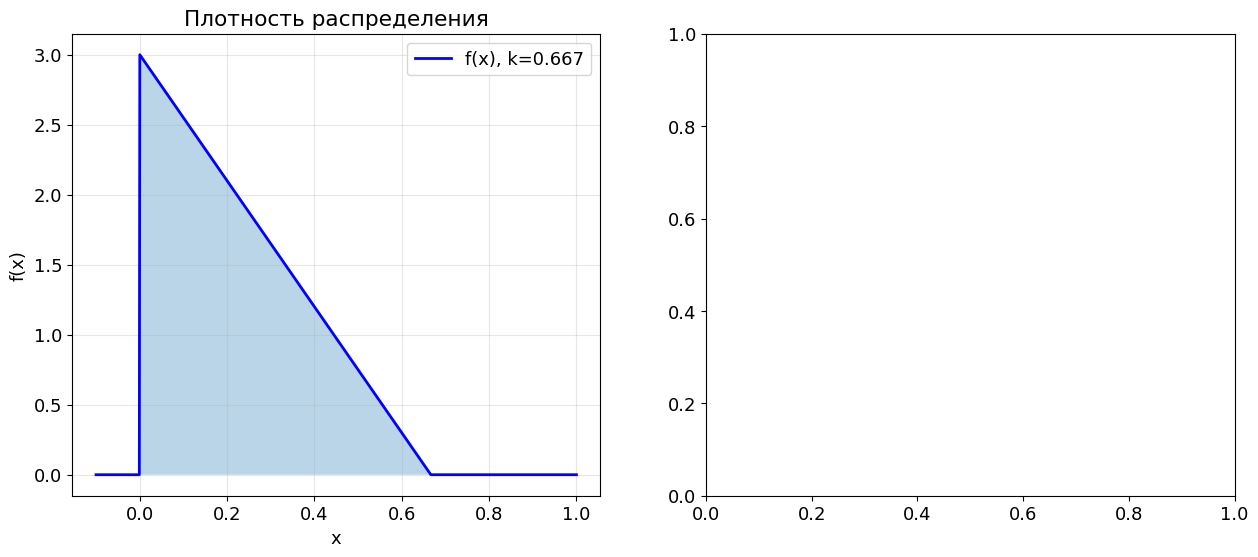

In [16]:
# 2. График плотности распределения
def f(x, k):
    return np.where((x >= 0) & (x <= k), 3 * (1 - x/k), 0)

# 3. Функция распределения
def F(x, k):
    return np.where(x < 0, 0,
           np.where(x <= k, 3*x - (3/(2*k)) * x**2, 1))

# Построение графиков
fig, (ax1, ax2) = pl.subplots(1, 2, figsize=(15, 6))

# График плотности
x_dense = np.linspace(-0.1, 1.0, 1000)
ax1.plot(x_dense, f(x_dense, k), 'b-', linewidth=2, label=f'f(x), k={k:.3f}')
ax1.fill_between(x_dense, f(x_dense, k), alpha=0.3)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Плотность распределения')
ax1.grid(True, alpha=0.3)
ax1.legend()


In [20]:

# График функции распределения
ax2.plot(x_dense, F(x_dense, k), 'r-', linewidth=2, label=f'F(x), k={k:.3f}')
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title('Интегральная функция распределения')
ax2.grid(True, alpha=0.3)
ax2.legend()

pl.tight_layout()
pl.show()

# Дополнительная проверка свойств
print("\nПроверка свойств распределения:")
print(f"1. f(x) ≥ 0 для всех x: {np.all(f(x_dense, k) >= 0)}")
print(f"2. ∫f(x)dx = 1: {np.trapezoid(f(x_dense, k), x_dense):.6f}")
print(f"3. F(0) = {F(0, k):.6f}")
print(f"4. F(k) = {F(k, k):.6f}")
print(f"5. F(∞) = {F(10, k):.6f}")

<Figure size 1300x900 with 0 Axes>


Проверка свойств распределения:
1. f(x) ≥ 0 для всех x: True
2. ∫f(x)dx = 1: 1.001051
3. F(0) = 0.000000
4. F(k) = 1.000000
5. F(∞) = 1.000000
